In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [12]:
models = ['ref','PL1MeV','PL100MeV','resonance']

k = 0.1

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk',
                  'omega_cdm':0.12038,
                  'k_output_values':k,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none',
                  'start_sources_at_tau_c_over_tau_h':2e-3,
                  #'100*theta_s':1.042143,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  #'h':0.47556
                  'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                  'tight_coupling_approximation':0,
                 })
    if M == 'PL1MeV':
        cosmo[M].set({'a_bidm':5e-4,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'PL100MeV':
        cosmo[M].set({'a_bidm':5e-2,
                      'f_bidm':0.99,
                      'A_bidm':1.9e-41,
                      'm_bidm':100.,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'resonance':
        cosmo[M].set({'a_bidm':0.01,
                      'A_bidm':3e-5,
                      'm_bidm':500,
                      #'n_bidm':-4,
                      'bidm_type':'resonance',
                      'f_bidm':0.99,
                      'epsilon_bidm':1e-11})
    cosmo[M].compute()
    print([M])


['ref']
['PL1MeV']
['PL100MeV']
['resonance']


In [13]:
all_k ={}
one_k ={}
for M in models:
    all_k[M] = cosmo[M].get_perturbations()
    one_k[M] = all_k[M]['scalar'][0] 

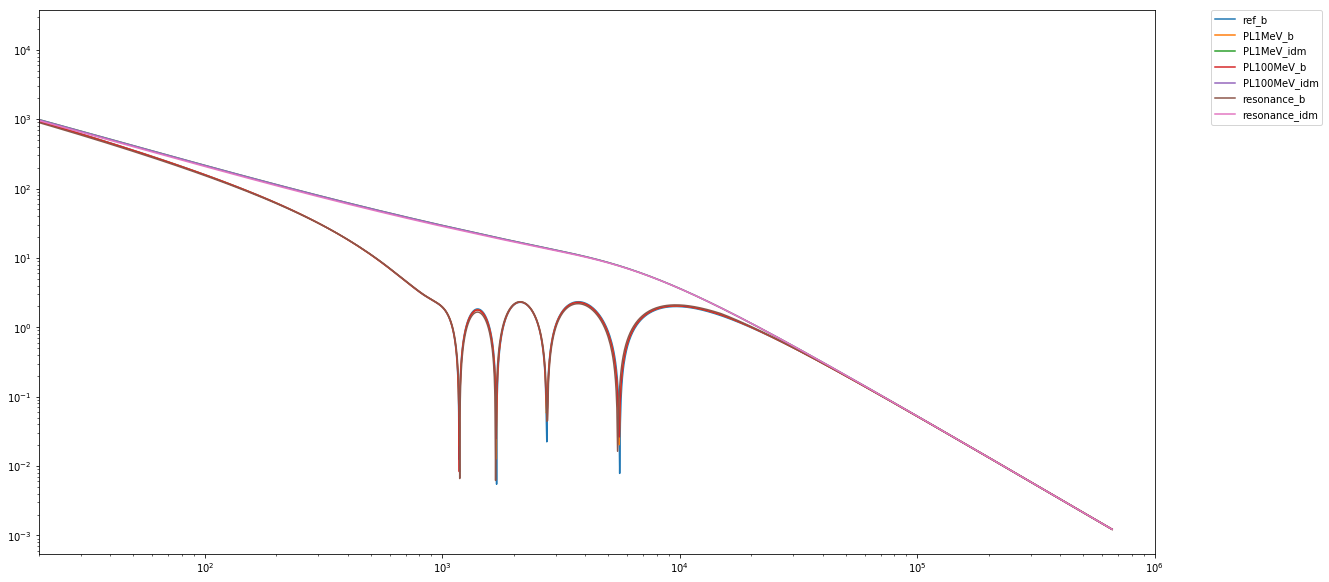

In [14]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    delta_b = abs(one_k[M]['delta_b'])
    delta_g = abs(one_k[M]['delta_g'])
    plt.loglog(z,delta_b,label=M + '_b')
    #plt.loglog(a,delta_g,label=M + '_g')
    if M != 'ref':
        delta_idm = abs(one_k[M]['delta_bidm'])
        plt.loglog(z,delta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

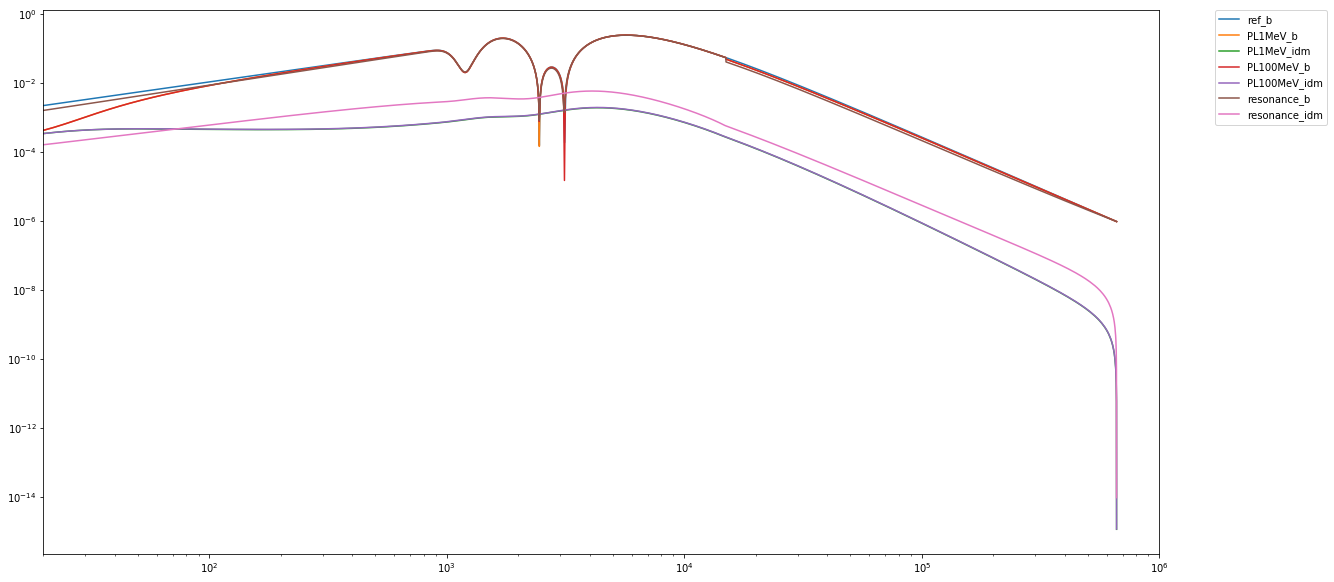

In [15]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    theta_b = abs(one_k[M]['theta_b'])
    theta_g = abs(one_k[M]['theta_g'])
    plt.loglog(z,theta_b,label=M + '_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    if M != 'ref':
        theta_idm = abs(one_k[M]['theta_bidm'])
        plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

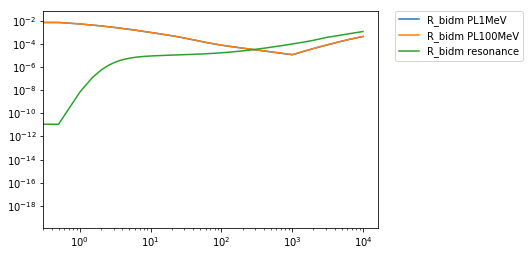

In [16]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm'],label='R_bidm '+M)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(0.001, 1)

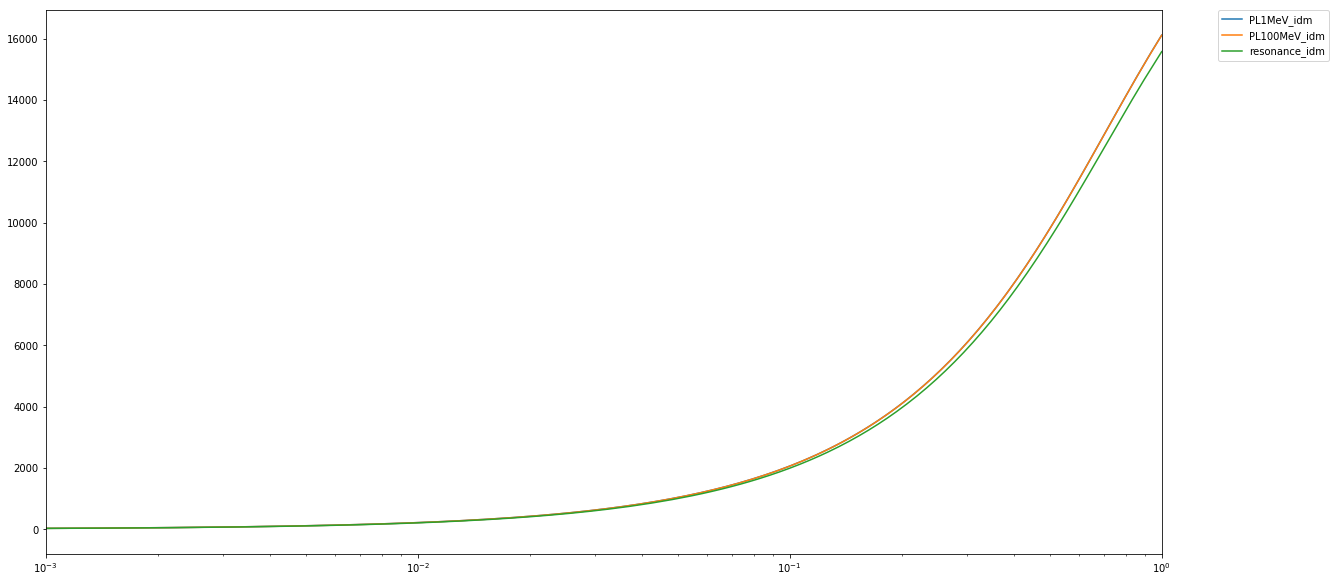

In [7]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    delta_g = abs(one_k[M]['delta_g'])
    #plt.loglog(a,delta_g,label=M + '_g')
    if M != 'ref':
        delta_idm = abs(one_k[M]['delta_bidm'])
        plt.semilogx(a,delta_idm,label=M + '_idm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1e-3,1)

In [8]:
a1 = one_k['idm1']['a']
a2 = one_k['idm2']['a']
aref = one_k['ref']['a']
delta_idm1 = abs(one_k['idm1']['delta_bidm'])
delta_idm2 = abs(one_k['idm2']['delta_bidm'])
delta_b1 = abs(one_k['idm1']['delta_b'])
delta_b2 = abs(one_k['idm2']['delta_b'])
delta_bref = abs(one_k['ref']['delta_b'])

dfunc1 = interp1d(a1,delta_idm1)
dfunc2 = interp1d(a2,delta_idm2)
dfunc1b = interp1d(a1,delta_b1)
dfunc2b = interp1d(a2,delta_b2)
dfuncbref = interp1d(aref,delta_bref)

KeyError: 'idm1'

In [9]:
aa = np.linspace(5e-4,1,10000)

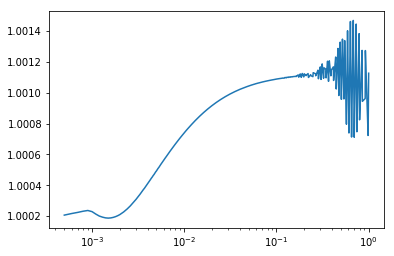

In [10]:
plt.semilogx(aa, dfunc1(aa)/dfunc2(aa))

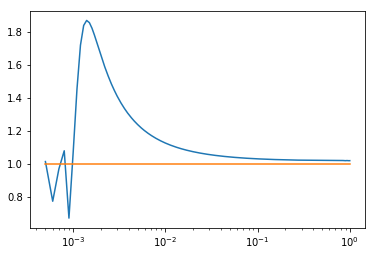

In [11]:
#plt.semilogx(aa, dfunc1b(aa)/dfunc2b(aa))
plt.semilogx(aa, dfunc1b(aa)/dfuncbref(aa))
plt.semilogx([5e-4,1],[1,1])

In [12]:
one_k['ref'].keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

Text(0,0.5,'R / aH')

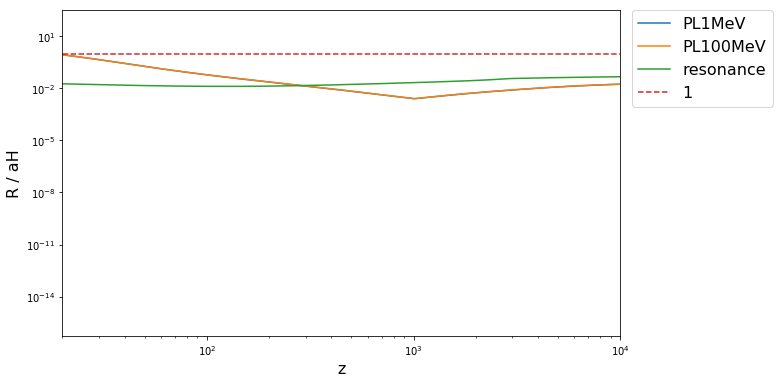

In [9]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111)
for M in models:
    if M != 'ref':
        Th = cosmo[M].get_thermodynamics()
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        ax.loglog(Th['z'],(1+Th['z'])*Th['Rbidm']/H,label=M)
ax.loglog([0,1e4],[1,1],linestyle='--',label='1')
ax.set_xlim([20,1e4])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.set_xlabel('z',fontsize=16)
ax.set_ylabel('R / aH',fontsize=16)

Text(0,0.5,'T [K]')

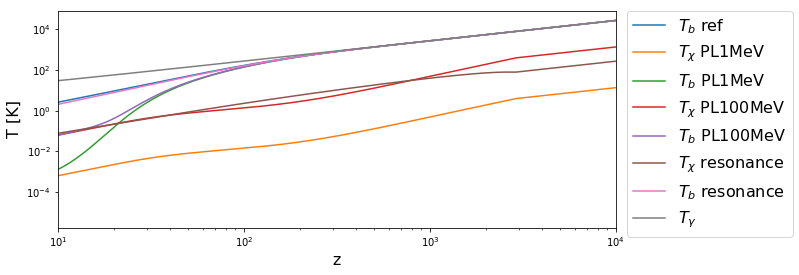

In [10]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        ax.loglog(Th['z'],Th['Tbidm [K]'],label='$T_\chi$ '+M)
    ax.loglog(Th['z'],Th['Tb [K]'],label = '$T_b$ '+M)
ax.loglog(Th['z'],2.73*(Th['z']+1), label = '$T_\gamma$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.set_xlim(10,1e4)
ax.set_xlabel('z',fontsize=16)
ax.set_ylabel('T [K]',fontsize=16)

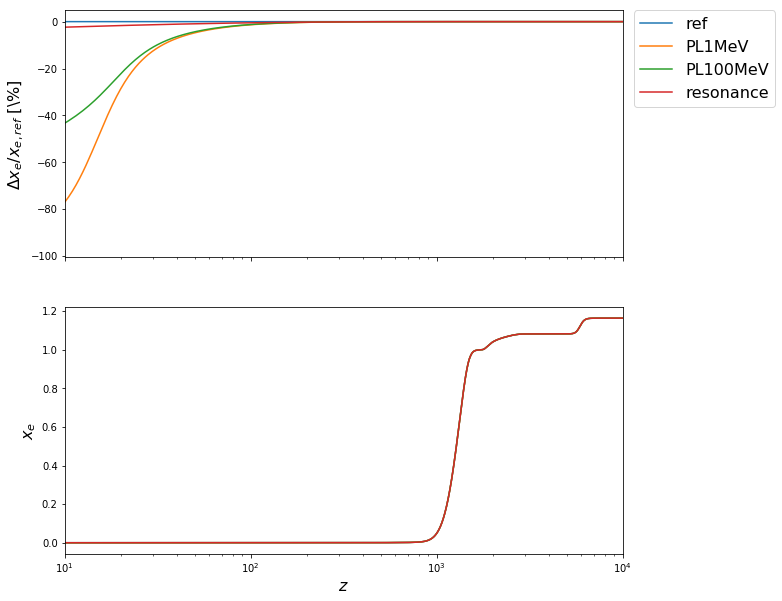

In [11]:
fig, axes = plt.subplots(2,1,figsize=(10,10),sharex=True)
Th = cosmo['ref'].get_thermodynamics()
x_eref = interp1d(Th['z'],Th['x_e'])

for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    axes[0].semilogx(Th['z'],100*((Th['x_e']-x_eref(Th['z']))/x_eref(Th['z'])),label=M)
    axes[1].semilogx(Th['z'],Th['x_e'],label='x_e '+M)
axes[0].set_xlim(10,1e4)
axes[0].set_ylabel('$\Delta x_e / {x_e}_{,ref}$ [\%]',fontsize=16)
axes[1].set_ylabel('$x_e$',fontsize=16)
axes[1].set_xlabel('$z$',fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
lgd = axes[0].legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)